<a href="https://colab.research.google.com/github/CodingWithMK/Global_AI_Hub_Medical_Cost_Analysis_Project/blob/main/Global_AI_Hub_Medical_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import zscore

Load and Explore Data

In [3]:
# Loading the data into a DataFrame
df = pd.read_csv("insurance.csv")

In [4]:
# Assigning a copy of the raw data for not manipulating the real data
mc_df = df.copy()

In [5]:
# Displaying the first 20 rows of the DataFrame
mc_df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
# Getting the basic informetion about the DataFrame
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**1.  Examine the distribution of Bmi (Body Mass Index)**

Data Visualization with Histogram

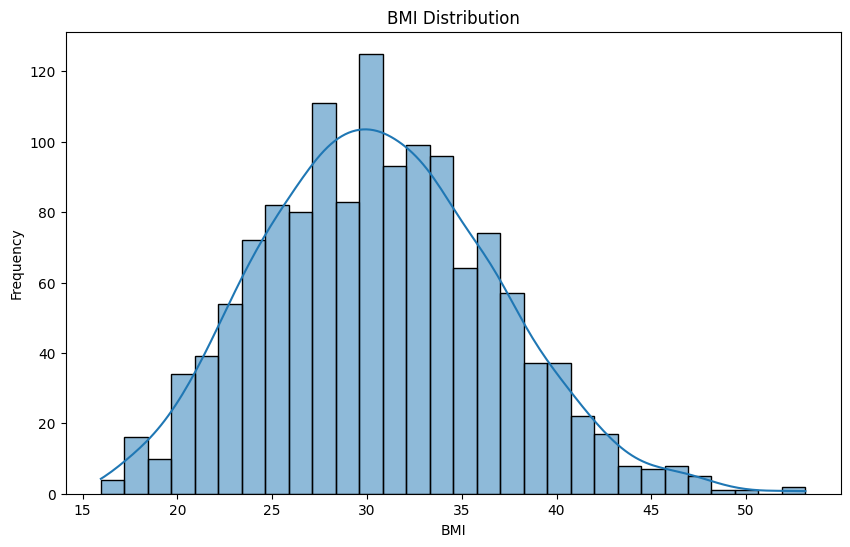

In [31]:
# Creating a histogram of BMI distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=mc_df, x='bmi', bins=30, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

Data Visualization with Density Plot

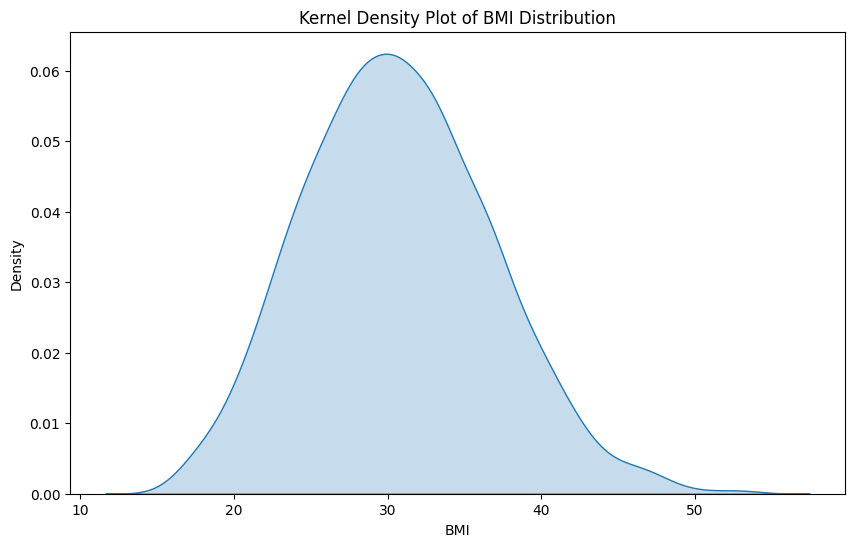

In [32]:
# Creating a kernel density plot of BMI distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=mc_df, x='bmi', fill=True)
plt.title('Kernel Density Plot of BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

Interpretation:
- Both the histogram and the density plot will help you understand how 'bmi' values are distributed across the dataset.
- You can observe the shape of the distribution, identify potential modes, and assess whether the distribution is symmetric or skewed.

**2. Examine the relationship between "smoker" and "charges"**

Data Vizualization

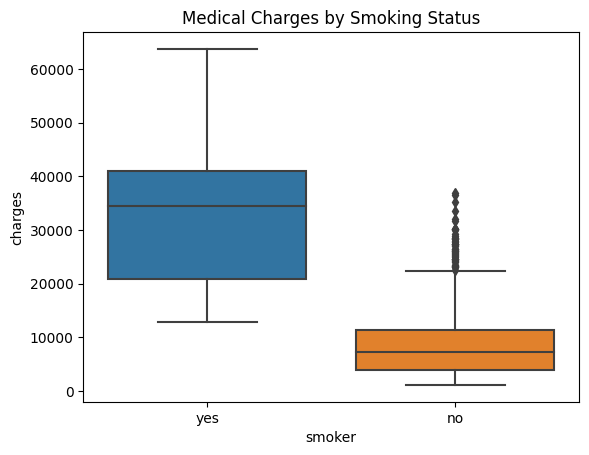

In [7]:
# Creating a box plot to visualize charges distribution based on smoker status
sns.boxplot(x='smoker', y='charges', data=mc_df)
plt.title('Medical Charges by Smoking Status')
plt.show()

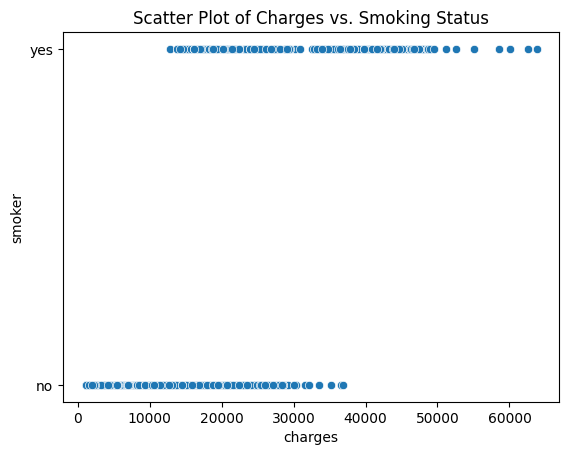

In [8]:
# Creating a scatter plot to see if there's a correlation between charges and smoking status
sns.scatterplot(x='charges', y='smoker', data=mc_df)
plt.title('Scatter Plot of Charges vs. Smoking Status')
plt.show()

Statistical Analysis

In [9]:
# Seperating charges for smokers and non-smokers
charges_smoker = mc_df[mc_df['smoker'] == 'yes']['charges']
charges_non_smoker = mc_df[mc_df['smoker'] == 'no']['charges']

# Performing t-test
t_statistic, p_value = ttest_ind(charges_smoker, charges_non_smoker)
print(f'T-test results: t-statistic = {t_statistic}, p-value = {p_value}')

T-test results: t-statistic = 46.66492117272371, p-value = 8.271435842179102e-283


Interpretation:
- If the p-value is very low (typically less than 0.05), you can conclude that there's a statistically significant difference in charges between smokers and non-smokers.
- If the t-statistic is positive and the p-value is low, it suggests that charges for smokers tend to be higher than charges for non-smokers.

**3. Examine the relationship between "smoker" and "region"**

Data Visualization

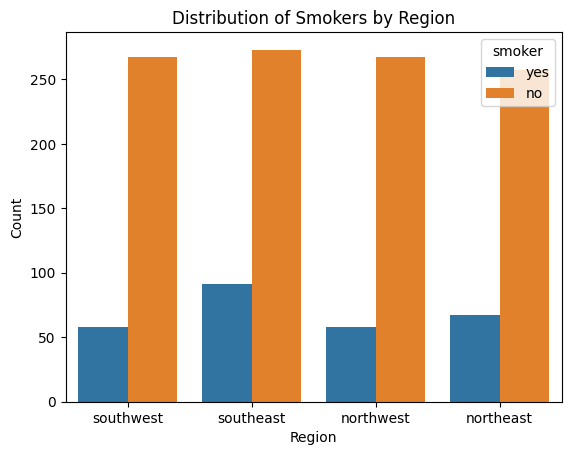

In [10]:
# Creating a count plot to visualize the distribution of smokers across regions

sns.countplot(x='region', hue='smoker', data=mc_df)
plt.title('Distribution of Smokers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

Statistical Analysis

In [11]:
# Creating a contingency table of smoker vs. region
contingency_table = pd.crosstab(mc_df['smoker'], mc_df['region'])

# Performing chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-quared test results: chi2 statistic = {chi2_stat}, p-value = {p_val}')

Chi-quared test results: chi2 statistic = 7.34347776140707, p-value = 0.06171954839170547


Interpretation:
- If the p-value is very low (typically less than 0.05), you can conclude that there's a statistically significant association between smoking status and region.
- If the p-value is higher, it suggests that there might not be a significant relationship between the two variables.

**4. Examine the relationship between "bmi" and "sex"**

Data Vizualization

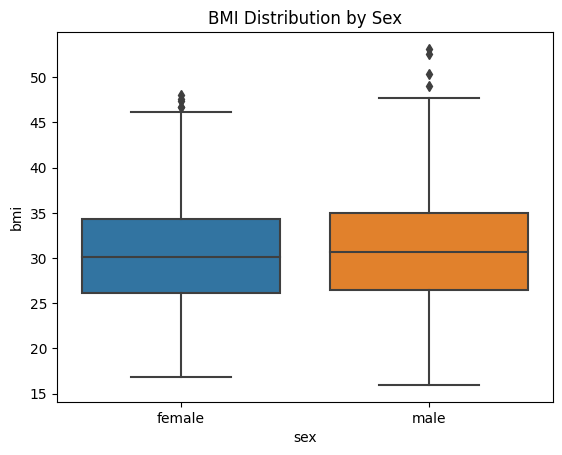

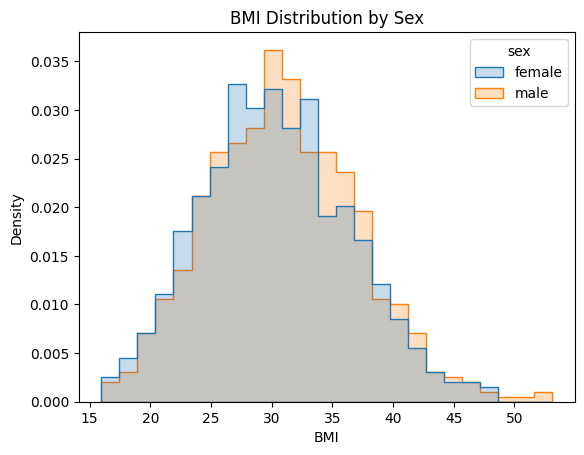

In [12]:
# Creating a box plot to visualize BMI distribution based on sex
sns.boxplot(x='sex', y='bmi', data=mc_df)
plt.title('BMI Distribution by Sex')
plt.show()

# Creating a histogram for BMI distribution based on sex
sns.histplot(data=mc_df, x='bmi', hue='sex', element='step', stat='density')
plt.title('BMI Distribution by Sex')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

Statistical Analysis

In [13]:
# Separating BMI values for males and females
bmi_male = mc_df[mc_df['sex'] == 'male']['bmi']
bmi_female = mc_df[mc_df['sex'] == 'female']['bmi']

# Performing t-test
t_statistic, p_value = ttest_ind(bmi_male, bmi_female)
print(f'T-test results: t-statistic = {t_statistic}, p-value = {p_value}')

T-test results: t-statistic = 1.696752635752224, p-value = 0.08997637178984932


Interpretation:
- If the p-value is very low (typically less than 0.05), you can conclude that there's a statistically significant difference in BMI between males and females.
- If the t-statistic is positive and the p-value is low, it suggests that the BMI for one sex tends to be higher than the other.

**5. Find the "region" with the most "children"**

Data Exploration

In [14]:
# Displaying unique values in the 'region' column
unique_regions = mc_df['region'].unique()
print(unique_regions)

['southwest' 'southeast' 'northwest' 'northeast']


Data Aggregation

In [15]:
# Grouping data by 'region' and sum the 'children' column
children_by_region = mc_df.groupby('region')['children'].sum().sort_values(ascending=False)
print(children_by_region)

region
southeast    382
northwest    373
southwest    371
northeast    339
Name: children, dtype: int64


Finding The Region With The Most Children

In [16]:
most_children_region = children_by_region.index[0]
most_children_count = children_by_region.iloc[0]

print(f"The region with the most children is '{most_children_region}' with a total of {most_children_count} children.")

The region with the most children is 'southeast' with a total of 382 children.


Visualization

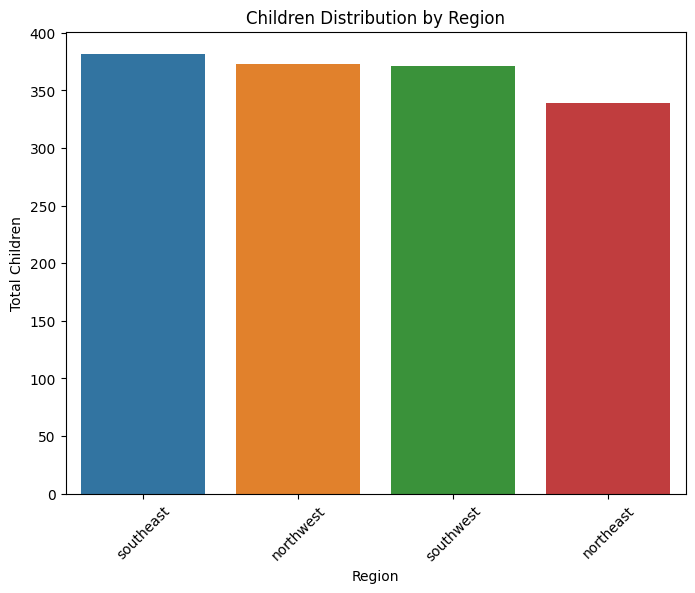

In [17]:
# Createing a bar plot to visualize children distribution by region
plt.figure(figsize=(8, 6))
sns.barplot(x=children_by_region.index, y=children_by_region.values)
plt.title('Children Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Children')
plt.xticks(rotation=45)
plt.show()

**6. Examine the relationship between “age” and “bmi”**

Data Visualization

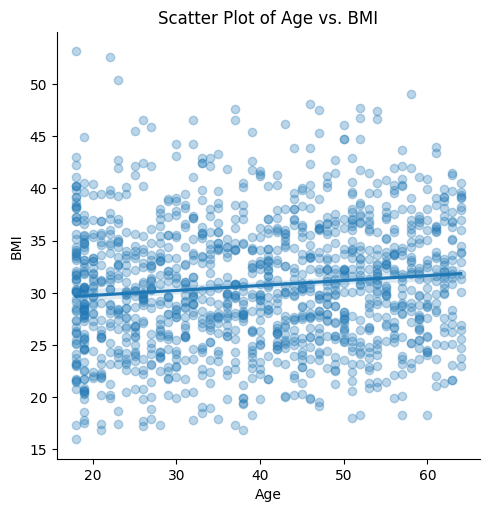

In [18]:
# Creating a scatter plot with regression line
sns.lmplot(x='age', y='bmi', data=mc_df, scatter_kws={'alpha':0.3})
plt.title('Scatter Plot of Age vs. BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

Correlation Analysis

In [19]:
correlation = mc_df['age'].corr(mc_df['bmi'])
print(f"Correlation between Age and BMI: {correlation:.2f}")

Correlation between Age and BMI: 0.11


Data Segmentation

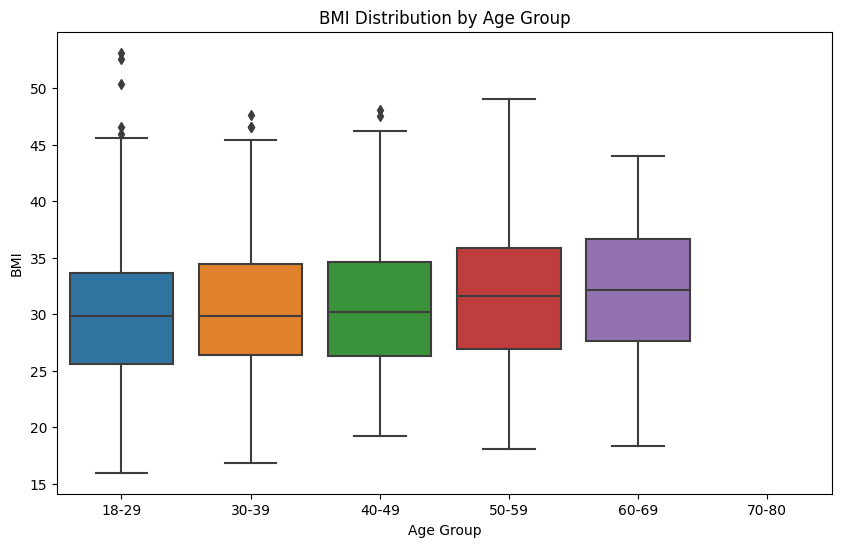

In [20]:
# Creating age bins and add a new column for age groups
age_bins = [18, 30, 40, 50, 60, 70, 80]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-80']
mc_df['age_group'] = pd.cut(mc_df['age'], bins=age_bins, labels=age_labels, right=False)

# Creating a box plot to visualize BMI distribution in each age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='bmi', data=mc_df)
plt.title('BMI Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('BMI')
plt.show()

Interpretation:
- If the scatter plot shows a clear trend, it suggests a potential relationship between age and BMI.
- The correlation coefficient provides a numerical measure of the strength and direction of the linear relationship.
- The box plot can help you see if there are differences in BMI distributions across different age groups.

**7. Examine the relationship between “bmi” and “children”.**


Data Visualization

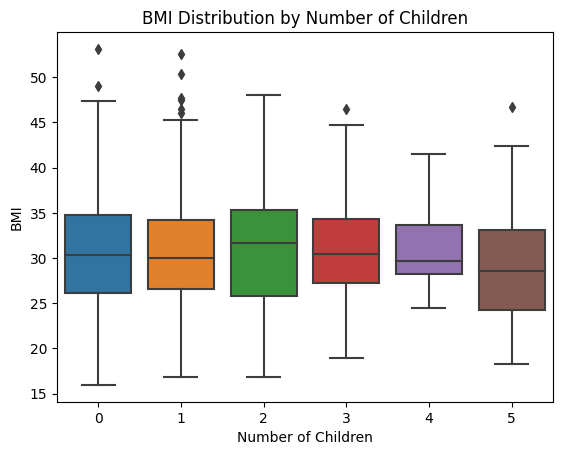

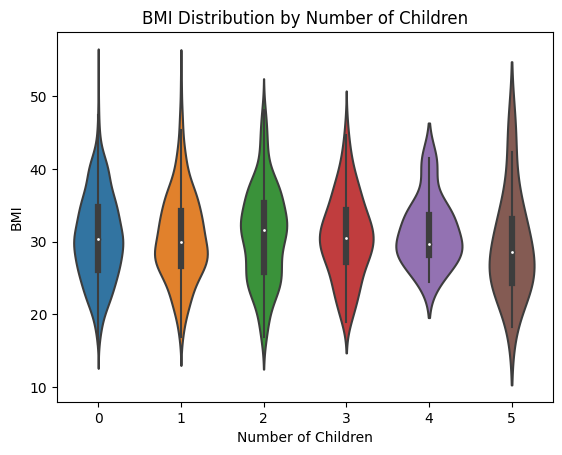

In [22]:
# Creating a box plot to visualize BMI distribution based on number of children
sns.boxplot(x='children', y='bmi', data=mc_df)
plt.title('BMI Distribution by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('BMI')
plt.show()

# Creating a violin plot for BMI distribution based on number of children
sns.violinplot(x='children', y='bmi', data=mc_df)
plt.title('BMI Distribution by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('BMI')
plt.show()

Statistical Analysis

In [23]:
# Calculating the mean BMI for each number of children
mean_bmi_by_children = mc_df.groupby('children')['bmi'].mean()
print(mean_bmi_by_children)

children
0    30.550296
1    30.623148
2    30.978104
3    30.684331
4    31.391200
5    29.605000
Name: bmi, dtype: float64


Interpretation:
- The box plot and violin plot can help you observe patterns in BMI distribution across different numbers of children.
- The mean BMI values can provide insights into the average BMI for different groups of children.

**8. Is there an outlier in the "bmi" variable?**

IQR Method

In [24]:
# Calculating the IQR (Interquartile Range)
Q1 = mc_df['bmi'].quantile(0.25)
Q3 = mc_df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finding out the outlier values
outliers = mc_df[(mc_df['bmi'] < lower_bound) | (mc_df['bmi'] > upper_bound)]

print("Outlier values in BMI:")
print(outliers)

Outlier values in BMI:
      age     sex    bmi  children smoker     region      charges age_group
116    58    male  49.06         0     no  southeast  11381.32540     50-59
286    46  female  48.07         2     no  northeast   9432.92530     40-49
401    47    male  47.52         1     no  southeast   8083.91980     40-49
543    54  female  47.41         0    yes  southeast  63770.42801     50-59
847    23    male  50.38         1     no  southeast   2438.05520     18-29
860    37  female  47.60         2    yes  southwest  46113.51100     30-39
1047   22    male  52.58         1    yes  southeast  44501.39820     18-29
1088   52    male  47.74         1     no  southeast   9748.91060     50-59
1317   18    male  53.13         0     no  southeast   1163.46270     18-29


Z-score Method

In [25]:
# Calculating Z-scores for BMI values
mc_df['bmi_zscore'] = zscore(mc_df['bmi'])

# Defining the Z-score threshold for outliers
zscore_threshold = 3

# Finding out the outlier values
outliers_zscore = mc_df[abs(mc_df['bmi_zscore']) > zscore_threshold]

print("Outlier values in BMI using Z-score method:")
print(outliers_zscore)

Outlier values in BMI using Z-score method:
      age   sex    bmi  children smoker     region     charges age_group  \
116    58  male  49.06         0     no  southeast  11381.3254     50-59   
847    23  male  50.38         1     no  southeast   2438.0552     18-29   
1047   22  male  52.58         1    yes  southeast  44501.3982     18-29   
1317   18  male  53.13         0     no  southeast   1163.4627     18-29   

      bmi_zscore  
116     3.017861  
847     3.234400  
1047    3.595298  
1317    3.685522  


**9. Examine the relationship between “bmi” and “charges”.**

Data Visualization

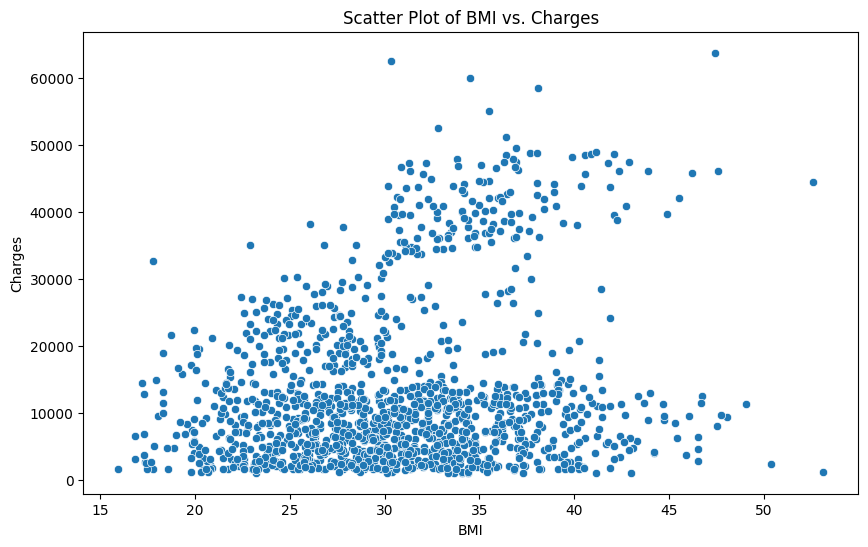

In [27]:
# Creating a scatter plot of BMI vs. Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=mc_df)
plt.title('Scatter Plot of BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

Correlation Analysis

In [28]:
correlation = mc_df['bmi'].corr(mc_df['charges'])
print(f"Correlation between BMI and Charges: {correlation:.2f}")

Correlation between BMI and Charges: 0.20


Regression Analysis

In [29]:
# Preparing the data for regression
X = mc_df['bmi'].values.reshape(-1, 1)
y = mc_df['charges'].values

# Creating and fit a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Getting the model's coefficients and intercept
slope = regression_model.coef_[0]
intercept = regression_model.intercept_

print(f"Regression Equation: Charges = {slope:.2f} * BMI + {intercept:.2f}")

Regression Equation: Charges = 393.87 * BMI + 1192.94


Interpretation:
- The scatter plot will visually show if there's a trend between 'bmi' and 'charges'.
- The correlation coefficient will quantify the strength and direction of the linear relationship.
- The regression analysis will provide insights into how changes in 'bmi' relate to changes in 'charges'.

**10. Examine the relationship between “region”, “smoker” and “bmi” using bar plot.**

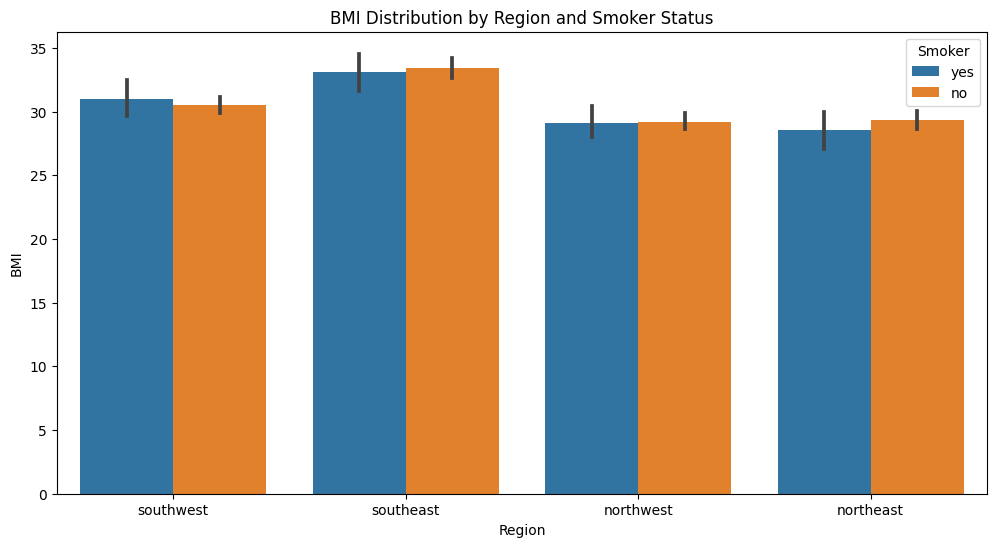

In [30]:
# Creating a bar plot of BMI distribution by region and smoker status
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='bmi', hue='smoker', data=mc_df)
plt.title('BMI Distribution by Region and Smoker Status')
plt.xlabel('Region')
plt.ylabel('BMI')
plt.legend(title='Smoker')
plt.show()

Interpretation:
- The bar plot will allow you to visually compare the distribution of 'bmi' for different combinations of 'region' and 'smoker'.
- You can identify any patterns or differences in 'bmi' across these categories.